In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os
from PIL import Image


In [2]:
# Set parameters
batch_size = 32
img_height, img_width = 150, 150

# Define paths
train_dir = 'glasses-noglasses/train'
val_dir = 'glasses-noglasses/validate'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data for validation
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training and validation images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 84 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


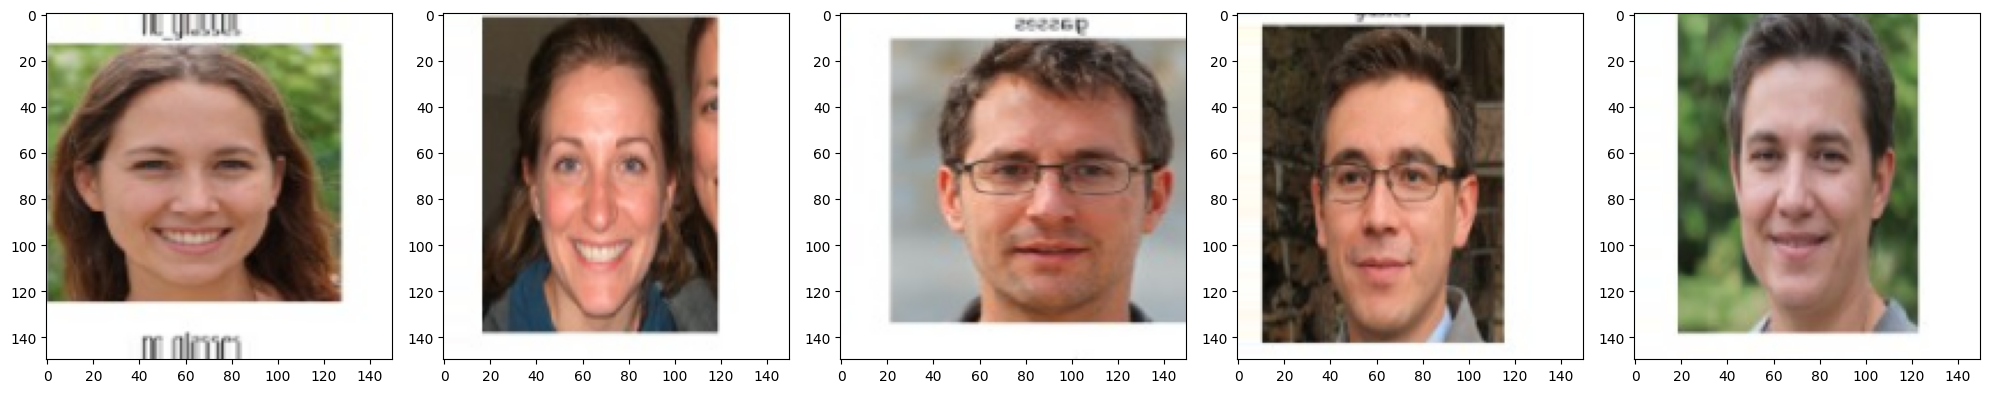

In [3]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# Get a batch of images
sample_training_images, _ = next(train_generator)
plot_images(sample_training_images[:5])


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


C:\Users\mukun\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)


NameError: name 'EarlyStopping' is not defined

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    #callbacks=[early_stop],
    epochs=48
    
)


Epoch 1/48


C:\Users\mukun\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5833 - loss: 3.0245 - val_accuracy: 0.5000 - val_loss: 0.7136
Epoch 2/48
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.5500 - loss: 0.7968

c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 415ms/step - accuracy: 0.5500 - loss: 0.7968 - val_accuracy: 0.5000 - val_loss: 1.5491
Epoch 3/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 750ms/step - accuracy: 0.5417 - loss: 1.2274 - val_accuracy: 0.5000 - val_loss: 0.7369
Epoch 4/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.4000 - loss: 0.8162 - val_accuracy: 0.7000 - val_loss: 0.6904
Epoch 5/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step - accuracy: 0.4479 - loss: 0.6992 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 6/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.4500 - loss: 0.7101 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 7/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 754ms/step - accuracy: 0.4896 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6839
Epoch 8/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.3000 - loss: 0.7117 - val_accuracy: 0.6000 - val_loss: 0.6831
Epoch 9/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 736ms/step - accuracy: 0.5923 - loss: 0.6865 - val_accuracy: 0.5000 - val_loss: 0.6920
Epo

In [7]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size, verbose=1)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 1.0000 - loss: 0.0768
Validation Accuracy: 100.00%


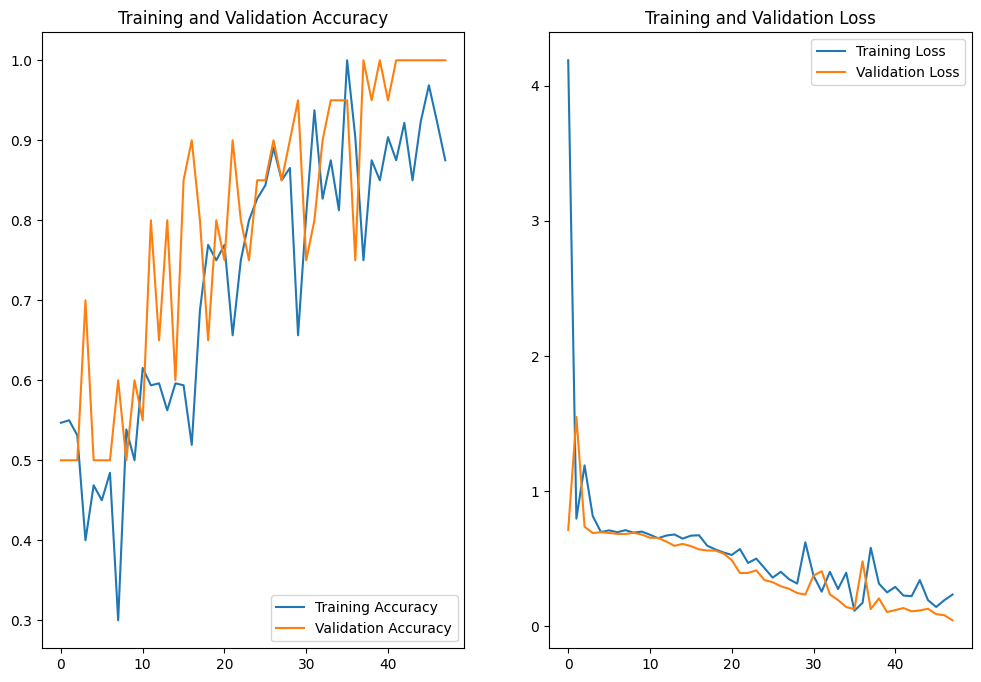

In [8]:
# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


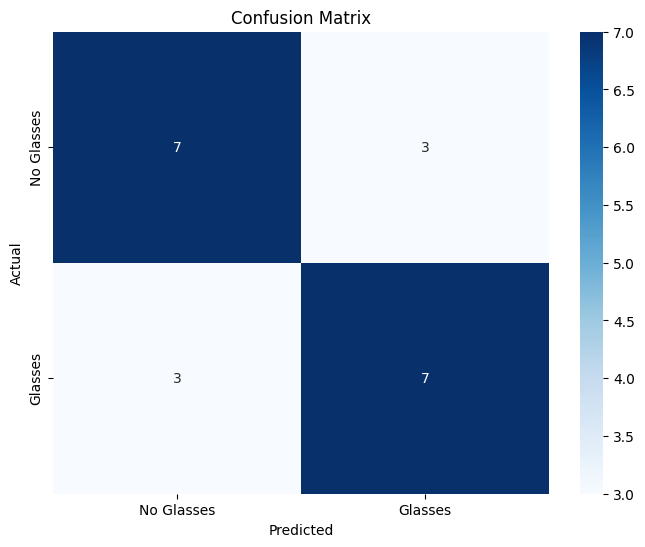

In [9]:
# Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // batch_size + 1)
y_pred = np.round(Y_pred).astype(int).flatten()

conf_mat = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', xticklabels=['No Glasses', 'Glasses'], yticklabels=['No Glasses', 'Glasses'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
print('Classification Report')
target_names = ['No Glasses', 'Glasses']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  No Glasses       0.70      0.70      0.70        10
     Glasses       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20



{'glasses': 0, 'noglasses': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Raw prediction output: [0.02905031]
Prediction: Glasses


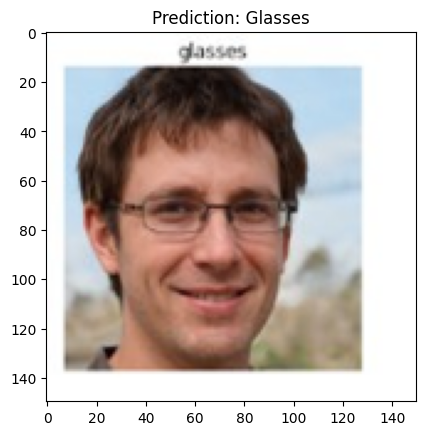

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming model is already defined and trained

# Check class indices
print(train_generator.class_indices)  # Should output {'glasses': 0, 'noglasses': 1} or similar

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the test image
test_img_path = 'glasses-noglasses/test/row-1-column-4.jpg'
test_img = load_and_preprocess_image(test_img_path)

# Make prediction
prediction = model.predict(test_img)

# Interpret the prediction
print("Raw prediction output:", prediction[0])
predicted_class = 'Glasses' if prediction[0] < 0.5 else 'No Glasses'
print(f'Prediction: {predicted_class}')

# Visualize the test image
plt.imshow(test_img[0])
plt.title(f'Prediction: {predicted_class}')
plt.show()


{'glasses': 0, 'noglasses': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Raw prediction output: [0.99731076]
Prediction: No Glasses


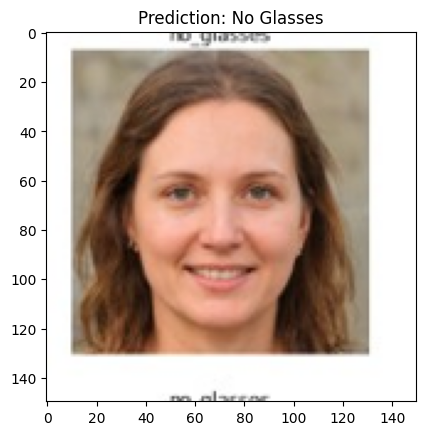

In [13]:
# Check class indices
print(train_generator.class_indices)  # Should output {'glasses': 0, 'noglasses': 1} or similar

# Function to load and preprocess image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the test image
test_img_path = 'glasses-noglasses/test/row-7-column-3.jpg'
test_img = load_and_preprocess_image(test_img_path)

# Make prediction
prediction = model.predict(test_img)

# Interpret the prediction
print("Raw prediction output:", prediction[0])
predicted_class = 'Glasses' if prediction[0] < 0.5 else 'No Glasses'
print(f'Prediction: {predicted_class}')

# Visualize the test image
plt.imshow(test_img[0])
plt.title(f'Prediction: {predicted_class}')
plt.show()
